### Детектор границ

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
from scipy import misc
from scipy import ndimage

In [86]:
img = imageio.imread('cat-bw.png')

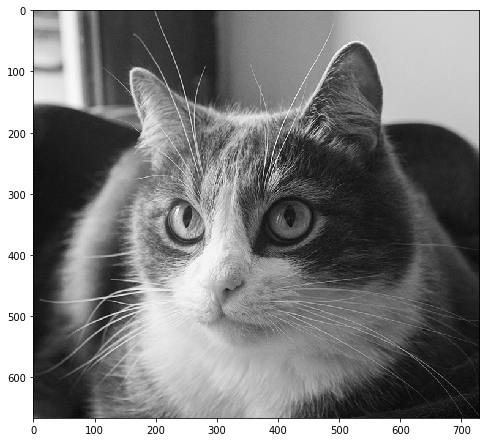

In [87]:
img_bw = img[:, :, 0]
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

In [88]:
def SobelFilter(img, direction):
    if(direction == 'x'):
        Gx = np.array([[-1,0,+1], [-2,0,+2],  [-1,0,+1]])
        Res = ndimage.convolve(img, Gx)
    if(direction == 'y'):
        Gy = np.array([[-1,-2,-1], [0,0,0], [+1,+2,+1]])
        Res = ndimage.convolve(img, Gy)
    return Res

In [89]:
def Normalize(img):
    img = img/np.max(img)
    return img

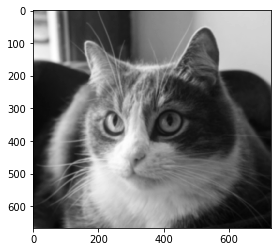

In [95]:
img_bw_gaus = ndimage.gaussian_filter(img_bw, sigma=2) 
plt.imshow(img_bw_gaus, cmap = plt.get_cmap('gray'))
plt.show()

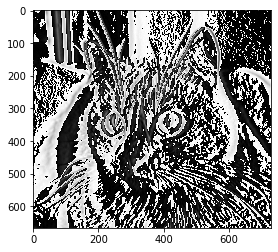

In [96]:
gx = SobelFilter(img_bw_gaus, 'x')
gx = Normalize(gx)
plt.imshow(gx, cmap = plt.get_cmap('gray'))
plt.show()

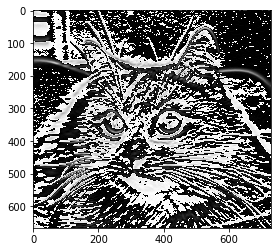

In [102]:
gy = SobelFilter(img_bw_gaus, 'y')
gy = Normalize(gy)
plt.imshow(gy, cmap = plt.get_cmap('gray'))
plt.show()

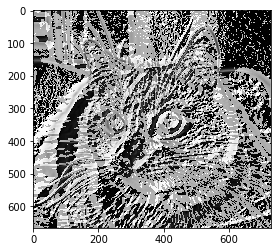

In [103]:
# Calculate the magnitude of the gradients obtained
Mag = np.hypot(gx,gy)
Mag = Normalize(Mag)
plt.imshow(Mag, cmap = plt.get_cmap('gray'))
plt.show()

## Цветовое пространство YUV

In [54]:
img = imageio.imread('cat-color.png')
img = img.astype(np.float32) / 255.
print(img.shape)

(667, 730, 3)


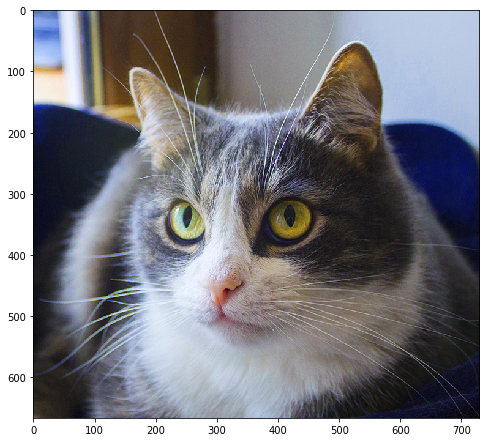

In [55]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [57]:
from skimage.color import rgb2yuv, yuv2rgb

In [60]:
img_yuv = rgb2hsv(img)

In [61]:
img_yuv[:5, :5, :]

array([[[0.61702126, 0.5136612 , 0.7176471 ],
        [0.6180555 , 0.51891893, 0.7254902 ],
        [0.6088435 , 0.5297297 , 0.7254902 ],
        [0.6088435 , 0.5240642 , 0.73333335],
        [0.61702126, 0.5136612 , 0.7176471 ]],

       [[0.6185567 , 0.53296703, 0.7137255 ],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6175439 , 0.5277778 , 0.7058824 ],
        [0.6175439 , 0.5248619 , 0.70980394]],

       [[0.6185567 , 0.5388889 , 0.7058824 ],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6180555 , 0.51336896, 0.73333335],
        [0.6175439 , 0.5277778 , 0.7058824 ],
        [0.6088435 , 0.5355191 , 0.7176471 ]],

       [[0.6111111 , 0.5238095 , 0.7411765 ],
        [0.6116667 , 0.52910054, 0.7411765 ],
        [0.605     , 0.53763443, 0.7294118 ],
        [0.605     , 0.53763443, 0.7294118 ],
        [0.6088435 , 0.5212766 , 0.7372549 ]],

       [[0.6094771 , 0.5396825 , 0.7411765 ],
        [0.60891086, 0.534

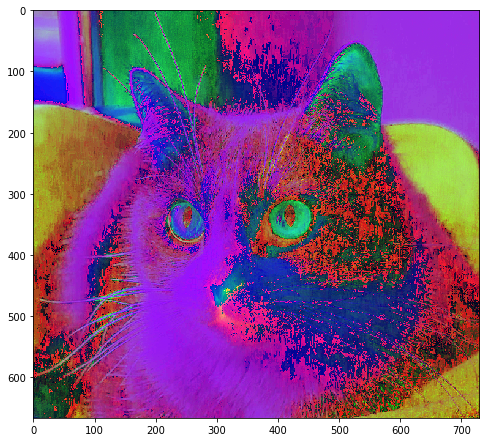

In [62]:
plt.figure(figsize=(8, 8))
plt.imshow(img_yuv)